In [1]:
# Line necessary to import agents in model, since the cwd of the notebook server is always the base path where you started the 
# server 
import sys
sys.path.append(".\sbp_toy_abm")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sbp_toy_abm.model import SBPAdoption

%matplotlib inline

# Model initialization, step and collection of outputs

Import data on farmers and farms

In [3]:
farmers_data = ".\data\FarmersData.xlsx"
farms_data = ".\data\FarmsData.xlsx"

Provide payments for SBP adoption

In [4]:
# Give payments in €/hectare, one entry for each year 
sbp_payment = [50, 50, 50]

In [5]:
payments = {'Sown Permanent Pasture': sbp_payment}

Initialize and run one step

In [42]:
# Note that the model is initialized with a seed to have the same results
model = SBPAdoption(farmers_data, farms_data, payments, seed=0)

In [43]:
model.step()

Adoption at the micro level retrieval

In [7]:
adoption_output = model.datacollector.get_agent_vars_dataframe()
adoption_output.head()

FARM_ID                 Pasture
Step AgentID                                
1    3          PT02  Sown Permanent Pasture
     5          PT13         Natural Pasture
     7          PT15  Sown Permanent Pasture
     9          PT16  Sown Permanent Pasture
     11         PT17  Sown Permanent Pasture

In [23]:
final_adoption = adoption_output.loc[max(adoption_output.index.get_level_values(0).tolist())]
final_adoption = final_adoption.set_index('FARM_ID')
final_adoption.head()

,Pasture
FARM_ID,
PT02,Sown Permanent Pasture
PT13,Natural Pasture
PT15,Sown Permanent Pasture
PT16,Sown Permanent Pasture
PT17,Sown Permanent Pasture


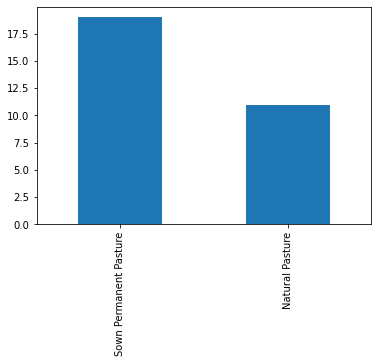

In [9]:
pd.value_counts(final_adoption['Pasture']).plot.bar()

Adoption at the macro level retrieval

In [10]:
aggregate_adoption = model.datacollector.get_model_vars_dataframe()
aggregate_adoption

,Percentage of adoption
0,63.333333


# Model validation

Get data with real pasture

In [25]:
real_adoption_path = ".\data\FarmsDataValidation.xlsx"
real_adoption = pd.read_excel(real_adoption_path, index_col=0)
real_adoption.head()

,Pasture
FARM_ID,
PT02,Natural Pasture
PT13,Sown Permanent Pasture
PT15,Sown Permanent Pasture
PT16,Natural Pasture
PT17,Sown Permanent Pasture


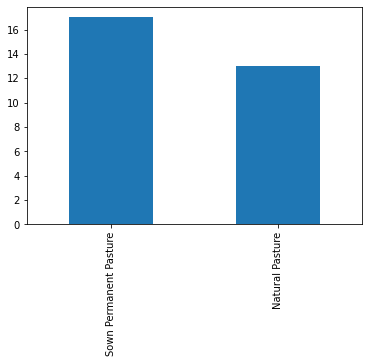

In [12]:
pd.value_counts(real_adoption['Pasture']).plot.bar()

## Micro-level validation

In [33]:
import sklearn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [40]:
# Ordered in the right way: the first, Natural Pature, is considered the negative class
confusion_matrix(real_adoption, final_adoption)

array([[ 4,  9],
       [ 7, 10]], dtype=int64)

In [35]:
print('Precision:', precision_score(real_adoption, final_adoption, pos_label='Sown Permanent Pasture'))
print('Recall:', recall_score(real_adoption, final_adoption, pos_label='Sown Permanent Pasture'))
print('F1 score:', f1_score(real_adoption, final_adoption, pos_label='Sown Permanent Pasture'))

Precision: 0.5263157894736842
Recall: 0.5882352941176471
F1 score: 0.5555555555555555


## Macro-level validation

In [14]:
real_farmers_adopted = real_adoption['Pasture'].value_counts()['Sown Permanent Pasture']
real_percentage_adoption = real_farmers_adopted / len(real_adoption['Pasture'])*100
real_percentage_adoption

56.666666666666664

In [30]:
modelled_percentage_adoption = aggregate_adoption.iloc[0, 0]
modelled_percentage_adoption

63.33333333333333